# Covid Death Report

The following contents are pulled from the CDC Data website (https://data.cdc.gov/). The CSV exports are from the following links:

* Weekly Counts of Deaths by State and Select Causes, 2014-2018: https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/3yf8-kanr

* Weekly Counts of Deaths by State and Select Causes, 2019-2020: https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/muzy-jte6

According to the second data source, this is the total of Covid-related deaths in the United States.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

deaths_14_18 = pd.read_csv("covid_data/Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018.csv")
deaths_19_20 = pd.read_csv("covid_data/Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv")

print("Total Covid Deaths in United States (2020)")
print(deaths_19_20["COVID-19 (U071, Multiple Cause of Death)"].sum())

Total Covid Deaths in United States (2020)
45370.0


This total is drastically different than the reported totals by Google (Who says they get their numbers from Wikipedia), and Johns Hopkins University. Below are two screenshots showing these numbers taken from the same day these numbers were run from.

<table>
    <tr>
        <td>   
            Google: <strong>83,019</strong><br />
            <img src="screenshots/google.png" />
        </td>
        <td>
            Johns Hopkins University: <strong>75,500</strong><br />
            <img src="screenshots/johnshopkins.png" />
        </td>
    </tr>
</table>

This is what the CDC says about their numbers:

>"Number of deaths reported in this table are the total number of deaths received and coded as of the date of analysis, and do not represent all deaths that occurred in that period. Data during this period are incomplete because of the lag in time between when the death occurred and when the death certificate is completed, submitted to NCHS and processed for reporting purposes. This delay can range from 1 week to 8 weeks or more. Percent of expected deaths is the number of deaths for all causes for this week in 2020 compared to the average number across the same week in 2017–2019. Previous analyses of 2015–2016 provisional data completeness have found that completeness is lower in the first few weeks following the date of death (<25%), and then increases over time such that data are generally at least 75% complete within 8 weeks of when the death occurred."

*Source: https://www.cdc.gov/nchs/nvss/vsrr/covid19/index.htm*

The following is some graphs comparing total deaths from the same time period, across multiple years, as well as comparisons to the current COVID-19 crisis and other Flu seasons. 

**Note: All totals are `<= max_week`. Meaning if `max_week=20`, all totals are from those years, weeks 1-20.**

California Total Flu Deaths in (2018)
4158.0
California Total Flu Deaths in (2019)
2856.0
California Total Covid Deaths in (2020)
1511.0


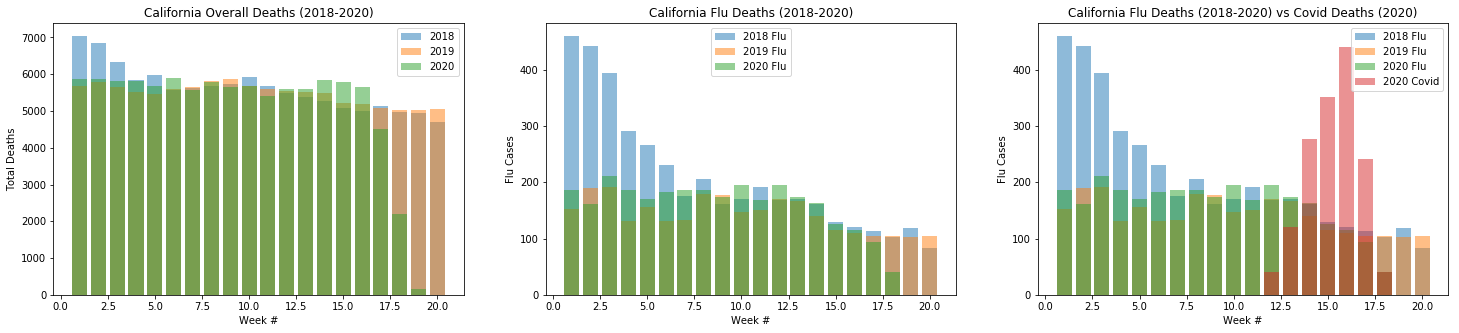

New York Total Flu Deaths in (2018)
1386.0
New York Total Flu Deaths in (2019)
1224.0
New York Total Covid Deaths in (2020)
5730.0


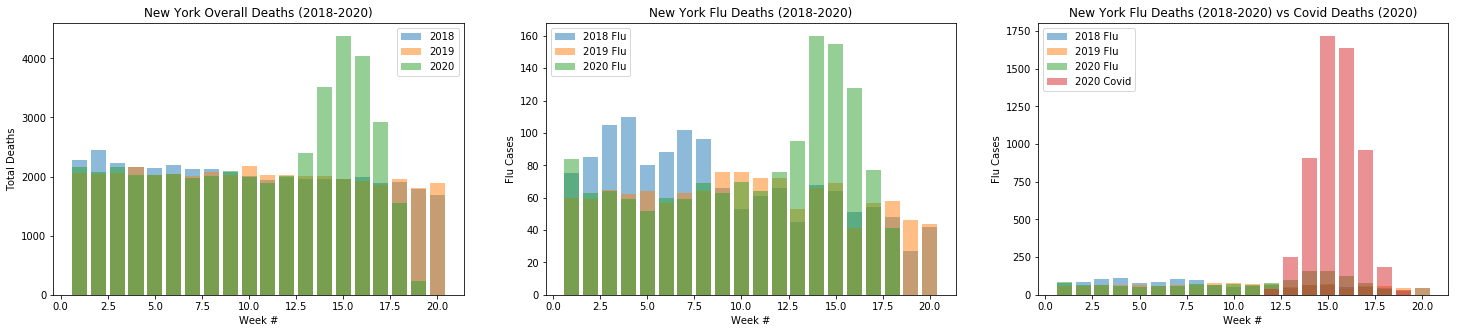

Nevada Total Flu Deaths in (2018)
289.0
Nevada Total Flu Deaths in (2019)
181.0
Nevada Total Covid Deaths in (2020)
181.0


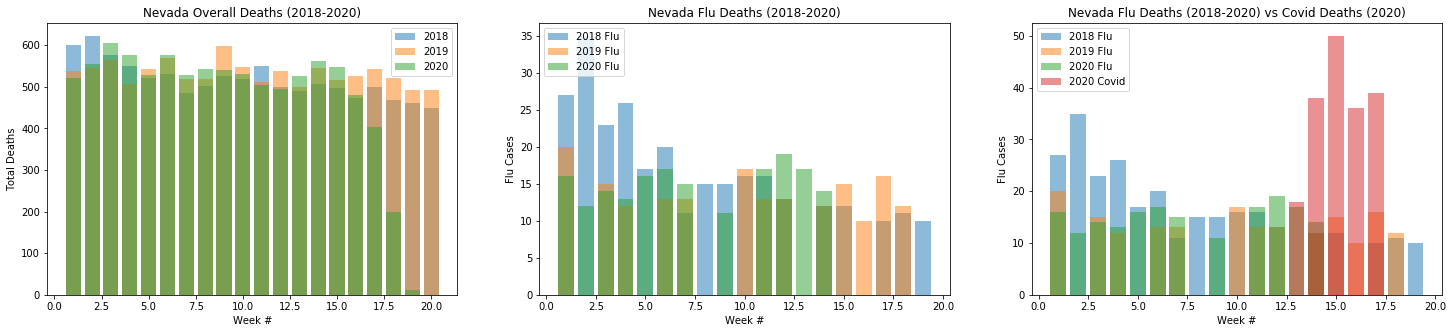

Texas Total Flu Deaths in (2018)
2161.0
Texas Total Flu Deaths in (2019)
1592.0
Texas Total Covid Deaths in (2020)
549.0


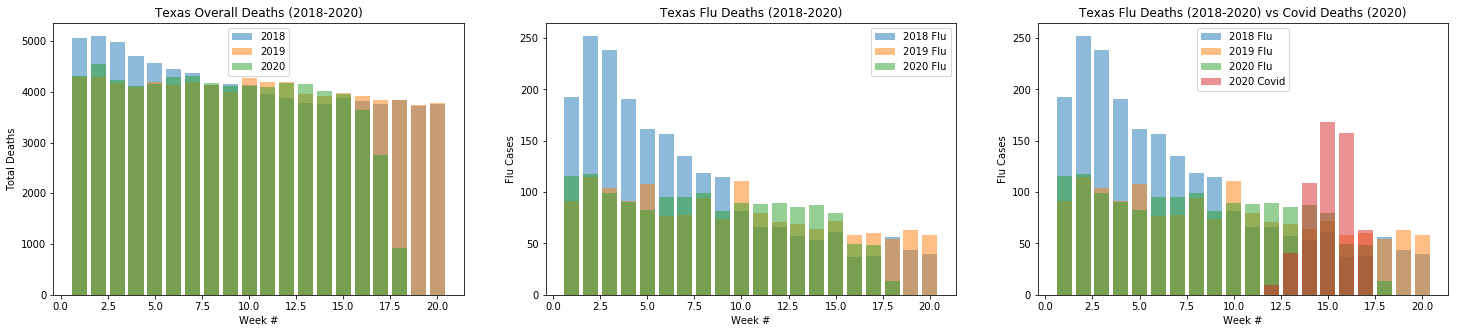

In [3]:
states = ["California", "New York", "Nevada", "Texas"]
max_week = 20

plt.rc('figure', figsize=(25, 5))
for state in states:

    total_cases_state = deaths_19_20[deaths_19_20["Jurisdiction of Occurrence"] == state]
    total_cases_state = total_cases_state[total_cases_state["MMWR Year"] == 2020]
    total_cases_state = total_cases_state[total_cases_state["MMWR Week"] <= max_week]
    total_cases_state = total_cases_state["COVID-19 (U071, Multiple Cause of Death)"].sum()

    total_flu_state_2019 = deaths_19_20[deaths_19_20["Jurisdiction of Occurrence"] == state]
    total_flu_state_2019 = total_flu_state_2019[total_flu_state_2019["MMWR Year"] == 2019]
    total_flu_state_2019 = total_flu_state_2019[total_flu_state_2019["MMWR Week"] <= max_week]
    total_flu_state_2019 = total_flu_state_2019["Influenza and pneumonia (J10-J18)"].sum()

    total_flu_state_2018 = deaths_14_18[deaths_14_18["Jurisdiction of Occurrence"] == state]
    total_flu_state_2018 = total_flu_state_2018[total_flu_state_2018["MMWR Year"] == 2018]
    total_flu_state_2018 = total_flu_state_2018[total_flu_state_2018["MMWR Week"] <= max_week]
    total_flu_state_2018 = total_flu_state_2018["Influenza and pneumonia (J10-J18)"].sum()

    print(state + " Total Flu Deaths in (2018)")
    print(total_flu_state_2018)

    print(state + " Total Flu Deaths in (2019)")
    print(total_flu_state_2019)

    print(state + " Total Covid Deaths in (2020)")
    print(total_cases_state)
    
    filtered_data_2018 = deaths_14_18[deaths_14_18["Jurisdiction of Occurrence"] == state]
    filtered_data_2018 = filtered_data_2018[filtered_data_2018["MMWR Year"] == 2018]
    filtered_data_2018 = filtered_data_2018[filtered_data_2018["MMWR Week"] <= max_week]

    filtered_data_2019 = deaths_19_20[deaths_19_20["Jurisdiction of Occurrence"] == state]
    filtered_data_2019 = filtered_data_2019[filtered_data_2019["MMWR Year"] == 2019]
    filtered_data_2019 = filtered_data_2019[filtered_data_2019["MMWR Week"] <= max_week]

    filtered_data_2020 = deaths_19_20[deaths_19_20["Jurisdiction of Occurrence"] == state]
    filtered_data_2020 = filtered_data_2020[filtered_data_2020["MMWR Year"] == 2020]
    filtered_data_2020 = filtered_data_2020[filtered_data_2020["MMWR Week"] <= max_week]


    plt.subplot(1, 3, 1)
    plt.bar(filtered_data_2018["MMWR Week"], filtered_data_2018["All  Cause"], label="2018", alpha=0.5)
    plt.bar(filtered_data_2019["MMWR Week"], filtered_data_2019["All Cause"], label="2019", alpha=0.5)
    plt.bar(filtered_data_2020["MMWR Week"], filtered_data_2020["All Cause"], label="2020", alpha=0.5)
    plt.title(state + " Overall Deaths (2018-2020)")
    plt.xlabel("Week #")
    plt.ylabel("Total Deaths")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.bar(filtered_data_2018["MMWR Week"], filtered_data_2018["Influenza and pneumonia (J10-J18)"], label="2018 Flu", alpha=0.5)
    plt.bar(filtered_data_2019["MMWR Week"], filtered_data_2019["Influenza and pneumonia (J10-J18)"], label="2019 Flu", alpha=0.5)
    plt.bar(filtered_data_2020["MMWR Week"], filtered_data_2020["Influenza and pneumonia (J10-J18)"], label="2020 Flu", alpha=0.5)
    plt.title(state + " Flu Deaths (2018-2020)")
    plt.xlabel("Week #")
    plt.ylabel("Flu Cases")
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.bar(filtered_data_2018["MMWR Week"], filtered_data_2018["Influenza and pneumonia (J10-J18)"], label="2018 Flu", alpha=0.5)
    plt.bar(filtered_data_2019["MMWR Week"], filtered_data_2019["Influenza and pneumonia (J10-J18)"], label="2019 Flu", alpha=0.5)
    plt.bar(filtered_data_2020["MMWR Week"], filtered_data_2020["Influenza and pneumonia (J10-J18)"], label="2020 Flu", alpha=0.5)
    plt.bar(filtered_data_2020["MMWR Week"], filtered_data_2020["COVID-19 (U071, Multiple Cause of Death)"], label="2020 Covid", alpha=0.5)
    plt.title(state + " Flu Deaths (2018-2020) vs Covid Deaths (2020)")
    plt.xlabel("Week #")
    plt.ylabel("Flu Cases")
    plt.legend()

    plt.show()


## Interpretation of Data

From a simple analysis of the above data, a few things become apparent.

1. The deaths reported by the CDC through verification of death certificates appears to be 54% of the deaths reported by Google and 60% less than that of Johns Hopkins University.

2. Compared to other states, New York appears to be the only one that had significant number of deaths in 2020 compared to other states.

3. Most other states death counts are about the same in 2020 compared to previous years.

4. With the exception of New York, in 2018, there was a normal flu (Influenza) that appeared to have a much higher impact on deaths than Covid for this date range.

If any of the data above appears to be wrong, or something should be changed, please reach out via ` joshterrill.dev@gmail.com `. 